In [137]:
import pandas as pd

businessesdf  = pd.read_csv('food_license_data.csv')

businessesdf.columns

Index(['BusinessName', 'DBAName', 'Address', 'CITY', 'State', 'ZIP',
       'LICSTATUS', 'LICENSECAT', 'DESCRIPT', 'LicenseAddDtTm', 'dayphn',
       'Property_ID', 'Latitude', 'Longitude'],
      dtype='object')

In [138]:
import geojson
import shapely
from shapely.geometry import shape, Point
import folium

with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)


feature_d1 = gj['features'][0]
district1 = shape(feature_d1['geometry'])

feature_d2 = gj['features'][1]
district2 = shape(feature_d2['geometry'])

feature_d3 = gj['features'][4]
district3 = shape(feature_d3['geometry'])

feature_d4 = gj['features'][6]
district4 = shape(feature_d4['geometry'])

feature_d5 = gj['features'][8]
district5 = shape(feature_d5['geometry'])

feature_d6 = gj['features'][5]
district6 = shape(feature_d6['geometry'])

feature_d7 = gj['features'][2]
district7 = shape(feature_d7['geometry'])

feature_d8 = gj['features'][3]
district8 = shape(feature_d8['geometry'])

feature_d9 = gj['features'][7]
district9 = shape(feature_d9['geometry'])

districtMap = folium.Map(location=[42.333943, -71.130000], zoom_start = 13)
folium.GeoJson(data=district1).add_to(districtMap)
folium.GeoJson(data=district2).add_to(districtMap)
folium.GeoJson(data=district3).add_to(districtMap)
folium.GeoJson(data=district4).add_to(districtMap)
folium.GeoJson(data=district5).add_to(districtMap)
folium.GeoJson(data=district6).add_to(districtMap)
folium.GeoJson(data=district7).add_to(districtMap)
folium.GeoJson(data=district8).add_to(districtMap)
folium.GeoJson(data=district9).add_to(districtMap)
food_businesses = businessesdf.copy()

# district1 = shape(gj['features'][0]['geometry'])
# district2 = shape(gj['features'][1]['geometry'])
# district3 = shape(gj['features'][4]['geometry'])
# district4 = shape(gj['features'][6]['geometry'])
# district5 = shape(gj['features'][8]['geometry'])
# district6 = shape(gj['features'][5]['geometry'])
# district7 = shape(gj['features'][2]['geometry'])
# district8 = shape(gj['features'][3]['geometry'])
# district9 = shape(gj['features'][7]['geometry'])

food_businesses['District'] = 0

food_businesses

,BusinessName,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude,District
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.157410,0
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,Active,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.056130,0
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.113860,0
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,Active,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.072910,0
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,Active,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,ZESTO'S PIZZA,NaN,460 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2011-04-28 08:54:10,16175242004,28061.0,42.319350,-71.111540,0
3018,Ziggy's,NaN,583 Washington,Brighton,MA,02135,Active,FT,Eating & Drinking w/ Take Out,2020-10-23 12:17:07,16178333508,351055.0,0.000000,0.000000,0
3019,Zo,NaN,92 State,Boston,MA,02109,Active,FT,Eating & Drinking w/ Take Out,2011-12-16 09:44:46,16179016017,170003.0,42.359232,-71.055320,0
3020,Zuma Restaurant,NaN,1 Dalton,Boston,MA,02115,Active,FS,Eating & Drinking,2018-02-16 10:18:58,18574492500,351070.0,0.000000,0.000000,0


In [139]:
district_names = []
total_licenses = []

for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    num_food = len(businessesdf[businessesdf.apply(lambda x: Point(x.Longitude,x.Latitude).within(boundaries), axis=1)])
    total_licenses.append(num_food)

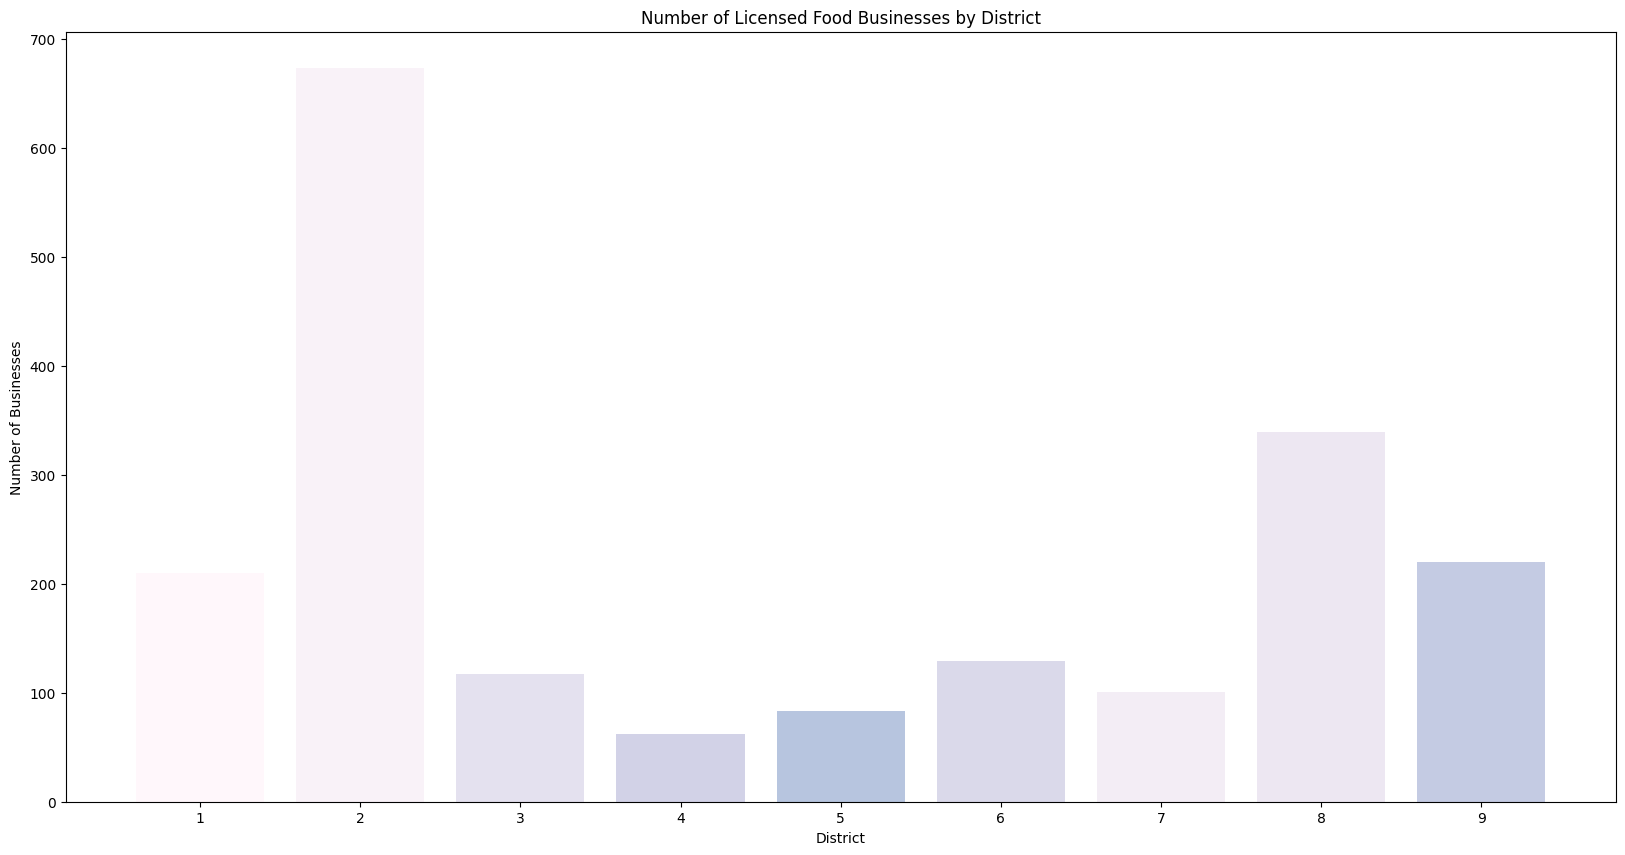

In [141]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

plt.figure(figsize=(20,10))
colors = plt.cm.PuBu(np.linspace(0, 2))
plt.bar(x=district_names, height=total_licenses, color=colors)

plt.title("Number of Licensed Food Businesses by District")
plt.xlabel("District")
plt.xticks([x for x in range(1,10)])
plt.ylabel("Number of Businesses")
plt.show()